C:\Users\dannu\anaconda3\Lib\site-packages\matplotlib\image.py:455: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
C:\Users\dannu\anaconda3\Lib\site-packages\matplotlib\image.py:460: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


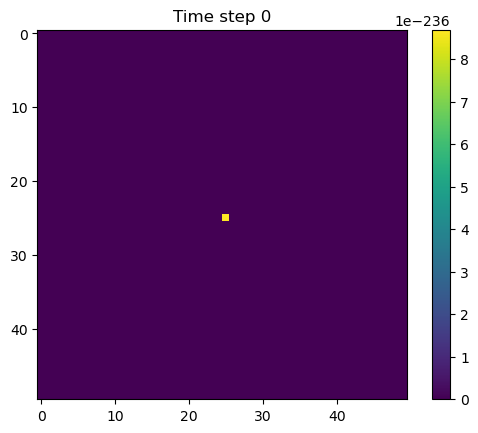

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
nx = 50  # Update with your simulation parameters
ny = 50
nt = 23

file_path = r'C:\Users\dannu\Desktop\4tran\EMWave\fort.11'

# Read the binary file
with open(file_path, 'rb') as file:
    field_data = np.fromfile(file, dtype=np.float64)

# Calculate the number of elements per time step based on the expected shape
elements_per_timestep = nx * ny

# Create a mask to identify NaN values
nan_mask = np.isnan(field_data)

# Remove NaN values from the field_data array
field_data = field_data[~nan_mask]

# Function to update the plot at each time step
def update(t):
    timesteps_data = field_data[t * elements_per_timestep:(t + 1) * elements_per_timestep]
    timesteps_data = timesteps_data.reshape((nx, ny))

    plt.clf()
    plt.imshow(timesteps_data)
    plt.title(f"Time step {t}")
    plt.colorbar()

# Create the animation
ani = FuncAnimation(plt.gcf(), update, frames=nt, interval=200)

# Display the animation in the Jupyter Notebook
HTML(ani.to_jshtml())
